In [40]:
import nilearn
from nibabel.testing import data_path
from nilearn import datasets, plotting, regions
import brainspace
import pandas as pd
import numpy as np
import os
from nilearn import surface
import nibabel as nib
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#import hcp_utils as hcp
from sklearn.neighbors import NearestNeighbors
from brainspace.gradient import GradientMaps
from brainspace.gradient.alignment import ProcrustesAlignment
from brainspace.utils.parcellation import map_to_labels, reduce_by_labels
from brainspace.datasets import load_conte69, load_parcellation
from brainspace.plotting import plot_hemispheres
from surfplot import plotting
import seaborn as sns
from surfplot.plotting import Plot
from icc_utils import *
from hyppo.discrim import DiscrimOneSample

## After `reduce_by_labels`

In [71]:
path = 'HCP/schaefer1000'

In [72]:
hcp_subjects = os.listdir(path)
hcp_subjects.remove('.DS_Store')

In [73]:
margulies_grads_schaefer1000 = np.load("margulies_grads_schaefer1000.npy")

In [75]:
schaefer_labels_1000_split = load_parcellation("schaefer", 1000, join = False)

In [79]:
LR_indices = np.unique(schaefer_labels_1000_split[0])
RL_indices = np.unique(schaefer_labels_1000_split[1])

In [ ]:
#Show me how to index an array in multiple places along axis 1
#https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-numpy-array-based-on-column-values

In [94]:
subj_ts = np.load(f"{path}/{subject}/func/{subject}_concat_ts_schaefer1000.npy").T
ts_batch1 = np.concatenate((subj_ts[:, :1200], subj_ts[:, 3600:]), axis = 1)
ts_batch2 = np.concatenate((subj_ts[:, 1200:2400], subj_ts[:, 2400:3600]), axis = 1)

## Compute Matrices

In [93]:
for subject in hcp_subjects:
    subj_ts = np.load(f"{path}/{subject}/func/{subject}_concat_ts_schaefer1000.npy").T

    ts_batch1 = np.concatenate((subj_ts[:, :1200], subj_ts[:, 3600:]), axis = 1)
    ts_batch2 = np.concatenate((subj_ts[:, 1200:2400], subj_ts[:, 2400:3600]), axis = 1)

    conn_mat_batch1 = np.corrcoef(ts_batch1)
    conn_mat_batch2 = np.corrcoef(ts_batch2)

    np.save(f'{path}/{subject}/func/conn_matrix_ses1_{subject}_schaefer1000', conn_mat_batch1)
    np.save(f'{path}/{subject}/func/conn_matrix_ses2_{subject}_schaefer1000', conn_mat_batch2)

    conn_mat_batch1_std =np.arctanh(conn_mat_batch1)
    conn_mat_batch2_std =np.arctanh(conn_mat_batch2)

    np.save(f'{path}/{subject}/func/z_conn_matrix_ses1_{subject}_schaefer1000', conn_mat_batch1_std)
    np.save(f'{path}/{subject}/func/z_conn_matrix_ses2_{subject}_schaefer1000', conn_mat_batch2_std)


/Users/VictoriaShevchenko/opt/miniconda3/envs/neuro/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/VictoriaShevchenko/opt/miniconda3/envs/neuro/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/2m/72fcyjmd7vs3g18rkfwx7nw40000gn/T/ipykernel_17733/1646471058.py:13: RuntimeWarning: divide by zero encountered in arctanh
  conn_mat_batch1_std =np.arctanh(conn_mat_batch1)
/var/folders/2m/72fcyjmd7vs3g18rkfwx7nw40000gn/T/ipykernel_17733/1646471058.py:14: RuntimeWarning: divide by zero encountered in arctanh
  conn_mat_batch2_std =np.arctanh(conn_mat_batch2)


## Compute Gradients: Cosine + PCA

In [96]:
for subject in hcp_subjects:
    z_corr_ses1 = np.load(f'{path}/{subject}/func/z_conn_matrix_ses1_{subject}_schaefer1000.npy')
    z_corr_ses2 = np.load(f'{path}/{subject}/func/z_conn_matrix_ses2_{subject}_schaefer1000.npy')
    zcorrs = [z_corr_ses1, z_corr_ses2]
    for i, zcorr in enumerate(zcorrs):
        if np.isnan(zcorr).any():
            nan_indices = np.where(np.isnan(zcorr))
            zcorr[nan_indices] = .0000000001
        if np.isinf(zcorr).any():
            inf_indices = np.where(np.isinf(zcorr))
            zcorr[inf_indices] = 1
        gm = GradientMaps(n_components=3, kernel = "cosine", approach= 'pca')
        gm.fit(zcorr)
        np.save(f'{path}/{subject}/func/gradients_sub-{subject}-ses{i + 1}', gm.gradients_)


GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

GradientMaps(approach='pca', kernel='cosine', n_components=3)

## Align

In [102]:
for subject in hcp_subjects:
    for i in range(1, 3):
        gradients = np.load(f'{path}/{subject}/func/gradients_sub-{subject}-ses{i}.npy')
        alignment = ProcrustesAlignment(verbose=True)
        aligned_gradients = alignment.fit(np.expand_dims(gradients, axis = 0), margulies_grads_schaefer1000.T)
        np.save(f'{path}/{subject}/func/aligned_3gradients_ses{i}_{subject}_schaefer1000', aligned_gradients.aligned_[0])

Iteration   0: 7628.005792
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 7645.991720
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 10188.770118
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 8452.164229
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 9101.124576
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 7826.095344
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 8705.600400
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 7643.478629
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 7932.985457
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 7707.732029
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 9905.208898
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 9060.897926
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 6689.925086
Iteration   1: 0.000000
Iteration   2: 0.000000
Iteration   0: 7356.6776

## Discriminability of aligned gradients

In [52]:
np.load('/Users/VictoriaShevchenko/Documents/PhD/HCP/schaefer1000/103414/func/aligned_3gradients_ses1_103414_schaefer1000.npy').shape

(1000, 3)

## Visualize

In [99]:
schaefer_labels_1000 = load_parcellation('schaefer', scale=1000, join=True)

In [103]:
subject = '103414'
grad_ses1 = np.load(f'{path}/{subject}/func/aligned_3gradients_ses1_{subject}_schaefer1000.npy')
grad_ses2 = np.load(f'{path}/{subject}/func/aligned_3gradients_ses2_{subject}_schaefer1000.npy')



grad_mapped_ses1 = [None]  * 3
for i, g in enumerate(grad_ses1.T):
    grad_mapped_ses1[i] = map_to_labels(g, schaefer_labels_1000, mask=schaefer_labels_1000 != 0, fill=np.nan)

grad_mapped_ses2 = [None]  * 3
for i, g in enumerate(grad_ses2.T):
    grad_mapped_ses2[i] = map_to_labels(g, schaefer_labels_1000, mask=schaefer_labels_1000 != 0, fill=np.nan)

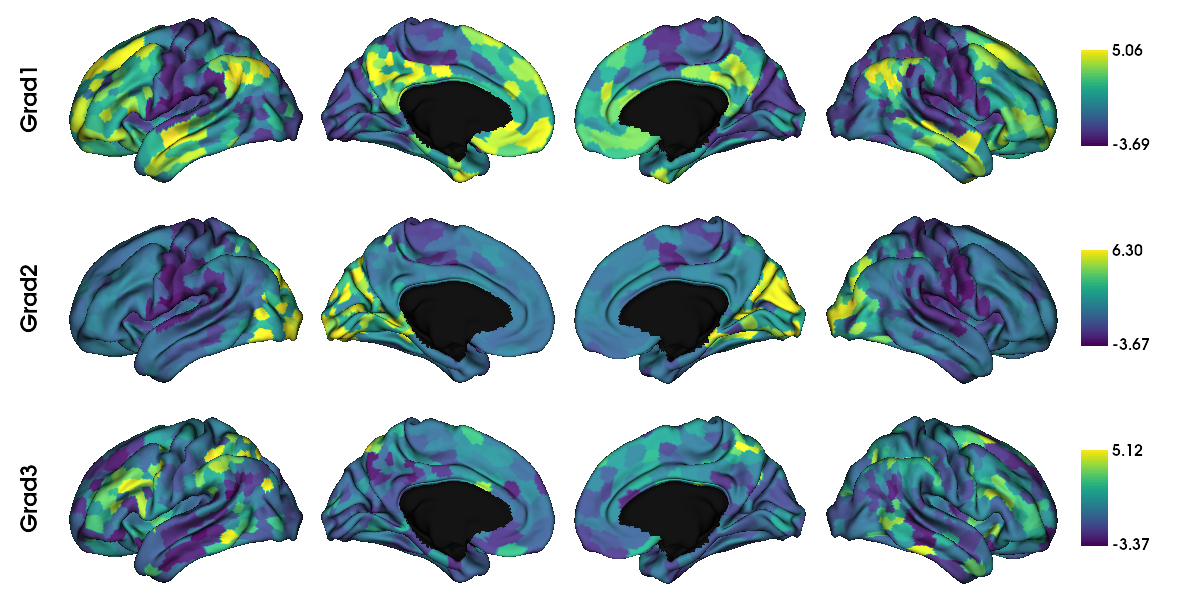

In [104]:
plot_hemispheres(surf_lh, surf_rh, array_name=grad_mapped_ses1, size=(1200, 600), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3'], zoom=1.5, embed_nb = True)

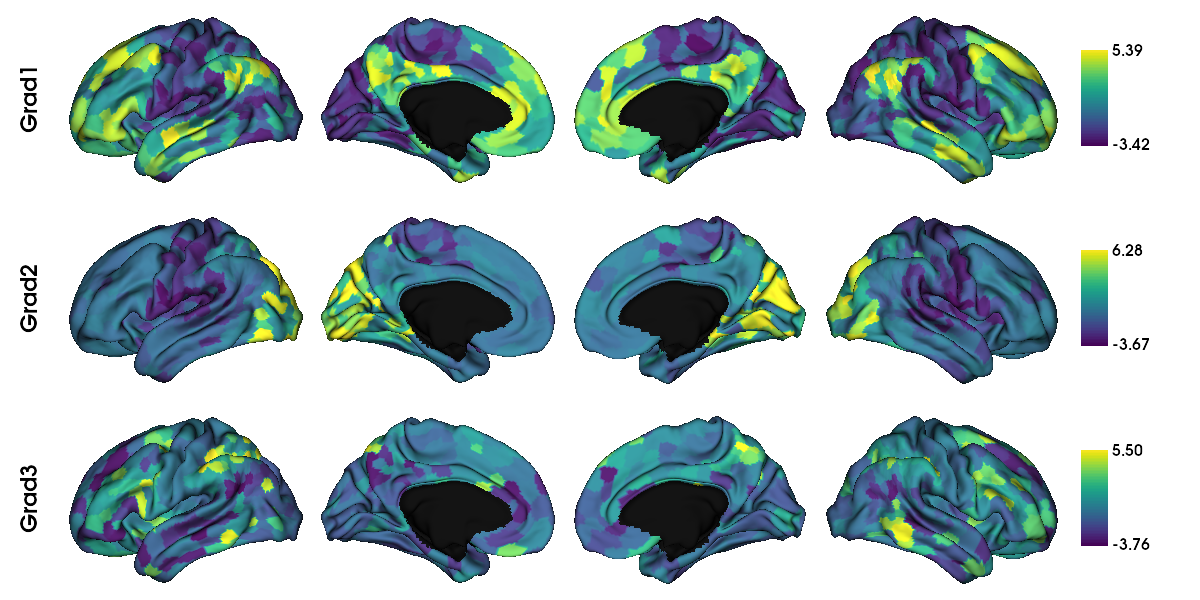

In [105]:
subject = '103414'
surf_lh, surf_rh = load_conte69()

plot_hemispheres(surf_lh, surf_rh, array_name=grad_mapped_ses2, size=(1200, 600), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3'], zoom=1.5, embed_nb = True)

## Discriminability of the 1st gradient

In [106]:
ses_labels = np.concatenate([np.zeros(len(hcp_subjects)), np.ones(len(hcp_subjects))], axis=0)
grad1_ses1 = np.stack([np.load(f'{path}/{subject}/func/aligned_3gradients_ses1_{subject}_schaefer1000.npy')[:, 0] for subject in hcp_subjects])
grad1_ses2 = np.stack([np.load(f'{path}/{subject}/func/aligned_3gradients_ses2_{subject}_schaefer1000.npy')[:, 0] for subject in hcp_subjects])

grad1 = np.row_stack((grad1_ses1, grad1_ses2))

In [107]:
np.load(f'{path}/{subject}/func/aligned_3gradients_ses1_{subject}_schaefer1000.npy')[:, 0].shape

(1000,)

In [35]:
#grad1[-1, :]

np.isnan(grad1).any()
np.isinf(grad1).any()
np.where(grad1[-1,:]==0)


False

False

(array([], dtype=int64),)

In [108]:
grad1_discrim = DiscrimOneSample().test(grad1, ses_labels, workers=-1)

In [109]:
grad1_discrim

DiscrimOneSampleTestOutput(stat=0.5088474213214698, pvalue=0.015984015984015984, null_dist=array([0.50012193, 0.49469682, 0.497507  , 0.49558659, 0.50503131,
       0.5003765 , 0.49527929, 0.50074889, 0.49538969, 0.50178201,
       0.499261  , 0.49651425, 0.49792964, 0.49753337, 0.49589389,
       0.49573323, 0.50210002, 0.49611303, 0.49873373, 0.4992577 ,
       0.50623579, 0.49833004, 0.49648789, 0.49787362, 0.49442989,
       0.50214039, 0.49838688, 0.50617647, 0.5009944 , 0.50768413,
       0.49871643, 0.50125721, 0.49828884, 0.49612374, 0.50099357,
       0.4956319 , 0.49860274, 0.49833086, 0.50135113, 0.50028753,
       0.50081232, 0.49817762, 0.51930549, 0.50017301, 0.49688499,
       0.49854836, 0.50582386, 0.49569287, 0.50229857, 0.50107843,
       0.50024551, 0.49968776, 0.4970959 , 0.49948509, 0.50439529,
       0.50100758, 0.49854177, 0.49578679, 0.50428489, 0.50201681,
       0.50197232, 0.4948171 , 0.49635442, 0.49963174, 0.49782172,
       0.49768825, 0.49778711, 0.49518

In [12]:
grad1.shape
ses_labels.shape


(170, 1000)

(170,)

In [14]:
x = np.concatenate([np.zeros((50, 2)), np.ones((50, 2))], axis=0)
y = np.concatenate([np.zeros(50), np.ones(50)], axis=0)

In [28]:
x = np.concatenate([np.zeros((85, 1000)), np.ones((85, 1000))], axis=0)
y = np.concatenate([np.zeros(85), np.ones(85)], axis=0)
x.shape
y.shape
DiscrimOneSample().test(x, y, workers=-1) 

(170, 1000)

(170,)

DiscrimOneSampleTestOutput(stat=1.0, pvalue=0.000999000999000999, null_dist=array([0.49765035, 0.49709343, 0.50878893, 0.49765035, 0.49876421,
       0.49709343, 0.49709343, 0.50544736, 0.49765035, 0.49765035,
       0.50878893, 0.49709343, 0.52215522, 0.500435  , 0.500435  ,
       0.49709343, 0.49765035, 0.500435  , 0.49876421, 0.49709343,
       0.50544736, 0.49765035, 0.500435  , 0.49709343, 0.49765035,
       0.500435  , 0.50544736, 0.49765035, 0.51714286, 0.49876421,
       0.50544736, 0.51268743, 0.50878893, 0.49765035, 0.49709343,
       0.50266271, 0.49709343, 0.49765035, 0.500435  , 0.500435  ,
       0.49709343, 0.49709343, 0.50544736, 0.49876421, 0.49765035,
       0.500435  , 0.49765035, 0.49765035, 0.50266271, 0.49709343,
       0.49709343, 0.49876421, 0.50266271, 0.49765035, 0.49709343,
       0.500435  , 0.50878893, 0.49765035, 0.49765035, 0.500435  ,
       0.49876421, 0.49709343, 0.49709343, 0.50266271, 0.50544736,
       0.49765035, 0.500435  , 0.49765035, 0.49709343